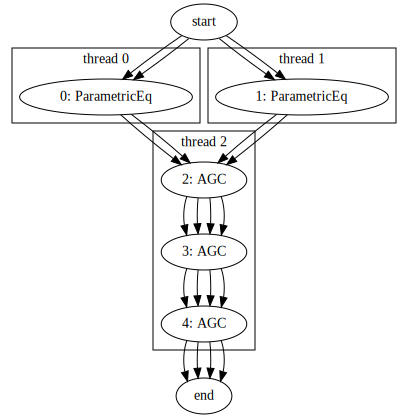

In [1]:
from dsp_ultra.design.pipeline import Pipeline
from dsp_ultra.stages.parametric_eq import ParametricEq
from dsp_ultra.stages.agc import AGC

# 4 inputs
p = Pipeline(4)

with p.add_thread() as t:
    pe0 = t.stage(ParametricEq, p.i[:2])

with p.add_thread() as t:
    pe1 = t.stage(ParametricEq, p.i[2:])

with p.add_thread() as t:
    _, _, agc = t.stages((AGC, AGC, AGC), [*pe1.o, *pe0.o])

p.set_outputs(agc.o)

p.draw()
# p.validate()

In [2]:
# do tuning
pe0["filter_coeffs"] = list(range(10))
agc["gain"] = 100

from dsp_ultra.design.pipeline import send_config_to_device
# send_config_to_device(p)

In [3]:
from dsp_ultra.design.pipeline import generate_dsp_main
generate_dsp_main(p)
# !cmake --build build